In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns

%matplotlib inline

In [2]:
# Modifies the options of pandas' display
pd.set_option("display.max_columns", None) # show all columns

In [3]:
# Read the data file
df = pd.read_csv("../dataset_checking/data/new_isaiah_dataset.csv").fillna("")

In [4]:
# Add this line to exclude the complement with only the preposition MN

df = df[(df.preposition_1 != "MN") & (df.preposition_2 == "")]
#df.head(2)
set(df.preposition_1)

{'',
 ' >L',
 '<D',
 '<L',
 '<L ',
 '<M',
 '>L',
 '>L ',
 '>XR/',
 'B',
 'BMW',
 'L',
 'TXT'}

In [6]:
df[(df.chapter == 25) & (df.verse_num == 15)]

,verb_id,lex,scroll,book,chapter,verse_num,gcons_verb,gcons_verse,sign_info,stem,tense,gcons_clause,subject,complement,cmpl_lex,cmpl_translation,dir_he,cmpl_constr,cmpl_nt,cmpl_anim,cmpl_det,cmpl_indiv,cmpl_complex,motion_type,preposition_1,preposition_2,preposition_3,preposition_4,comments


In [5]:
# Display the filtered dataframe or its length
df.head(5)
#len(df_cmpl)
data = df

In [6]:
### DATA EXPLORATION BY DATA VISUALISATIONS ###

In [7]:
### BAR PLOT FUNCTION ###

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a function to create stacked bar charts for easier reusedef plot_stacked_bar(data, x_var, hue_var, title):

def plot_stacked_bar(data, x_var, hue_var, title):
    """
    Creates a stacked bar chart.

    Parameters:
    - data: pandas DataFrame containing the data.
    - x_var: str, name of the variable to be plotted on the x-axis.
    - hue_var: str, name of the variable used for color encoding, creating the stacks.
    - title: str, the title of the plot.
    """
    # Create a cross-tabulation
    crosstab = pd.crosstab(data[x_var], data[hue_var], normalize='index')

    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel('Proportion')
    plt.legend(title=hue_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()

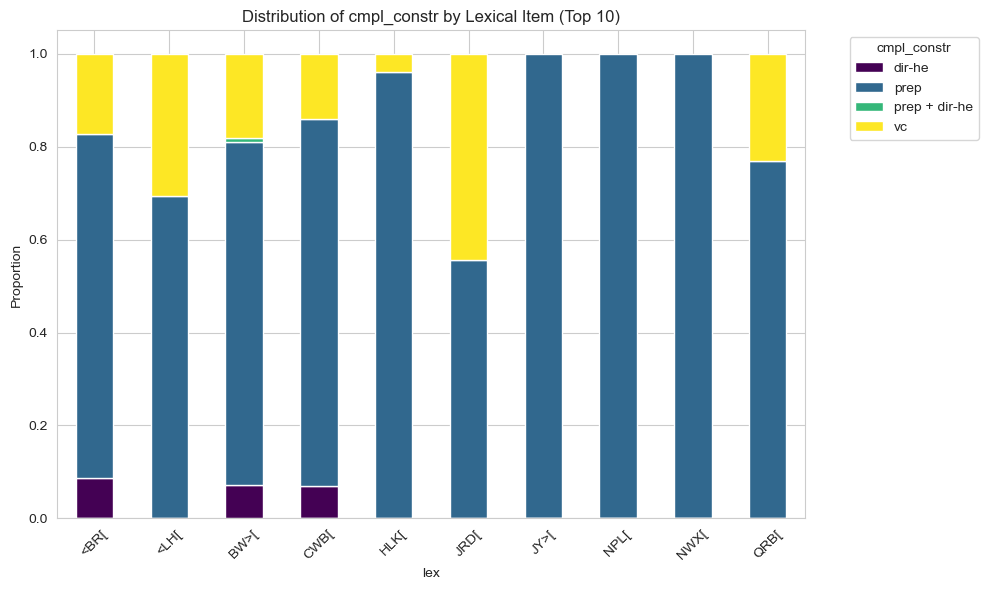

In [8]:
# Identify the most frequent lexical items in 'lex'
top_lex = data['lex'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the most frequent lexical items
filtered_data = data[data['lex'].isin(top_lex)]

# Plotting the distribution of cmpl_constr for the top lexical items
plot_stacked_bar(filtered_data, 'lex', 'cmpl_constr', 'Distribution of cmpl_constr by Lexical Item (Top 10)')

In [9]:
data['lex'].value_counts()

BW>[     126
HLK[      51
<LH[      49
CWB[      43
<BR[      23
NWX[      19
JRD[      18
QRB[      13
NPL[      10
JY>[       8
PNH[       7
GLH[       6
RWY[       6
NWS[       5
SBB[       4
NGC[       4
XSH[       4
<WP[       4
<WZ[       2
PF<[       2
CQQ[       2
XLP[       2
T<H[       2
NHR[       2
CWR=[      2
Name: lex, dtype: int64

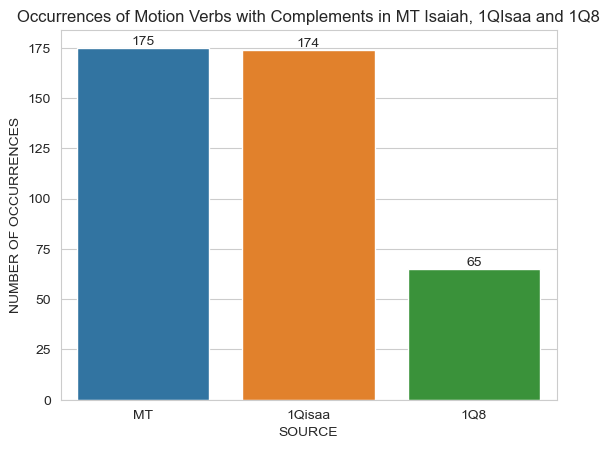

In [10]:
### OCCURRENCES PER SCROLL ###

# Count the occurrence for each scroll
occurrences_per_scroll = df["scroll"].value_counts().reset_index()
occurrences_per_scroll.columns =  ["scroll", "count"]

# Create a bar chart
ax = sns.barplot(x="scroll", y="count", data=occurrences_per_scroll)

# Add labels and title
plt.xlabel("SOURCE")
plt.ylabel("NUMBER OF OCCURRENCES")
plt.title("Occurrences of Motion Verbs with Complements in MT Isaiah, 1QIsaa and 1Q8")

# Iterate over the bars and use the `text` function to add annotations
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  # x position (center of the bar)
            p.get_height(),  # y position (top of the bar)
            f'{int(p.get_height())}',  # text (count)
            ha='center',  # horizontal alignment
            va='bottom')  # vertical alignment

plt.show()

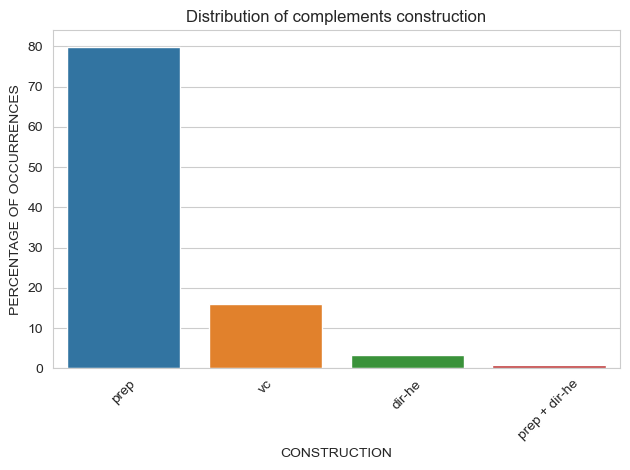

In [11]:
### OCCURRENCES PER CONSTRUCTION - DISTRIBUTION ###

# Count the occurrence for each scroll
occurrences_per_constr = df["cmpl_constr"].value_counts(normalize=True).reset_index()
occurrences_per_constr.columns =  ["construction", "percentage"]

# Convert the 'percentage' column to actual percentages
occurrences_per_constr['percentage'] *= 100

# Create a bar chart
ax = sns.barplot(x="construction", y="percentage", data=occurrences_per_constr)

# Add labels and title
plt.xlabel("CONSTRUCTION")
plt.ylabel("PERCENTAGE OF OCCURRENCES")
plt.title("Distribution of complements construction")


plt.xticks(rotation=45)  # Rotate the construction labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [12]:
### RELATIONSHIP BETWEEN COMPLEMENT CONSTRUCTION AND DEFINITENESS ### 

# Filter out rows where cmpl_det is 'na'
filtered_data = data[data['cmpl_det'] != 'na']

# Explore the distribution of the values of cmpl_det
cmpl_det_distribution = filtered_data['cmpl_det'].value_counts(normalize=True) * 100  # Get the percentage distribution

cmpl_det_distribution

det    84.299517
und    15.700483
Name: cmpl_det, dtype: float64

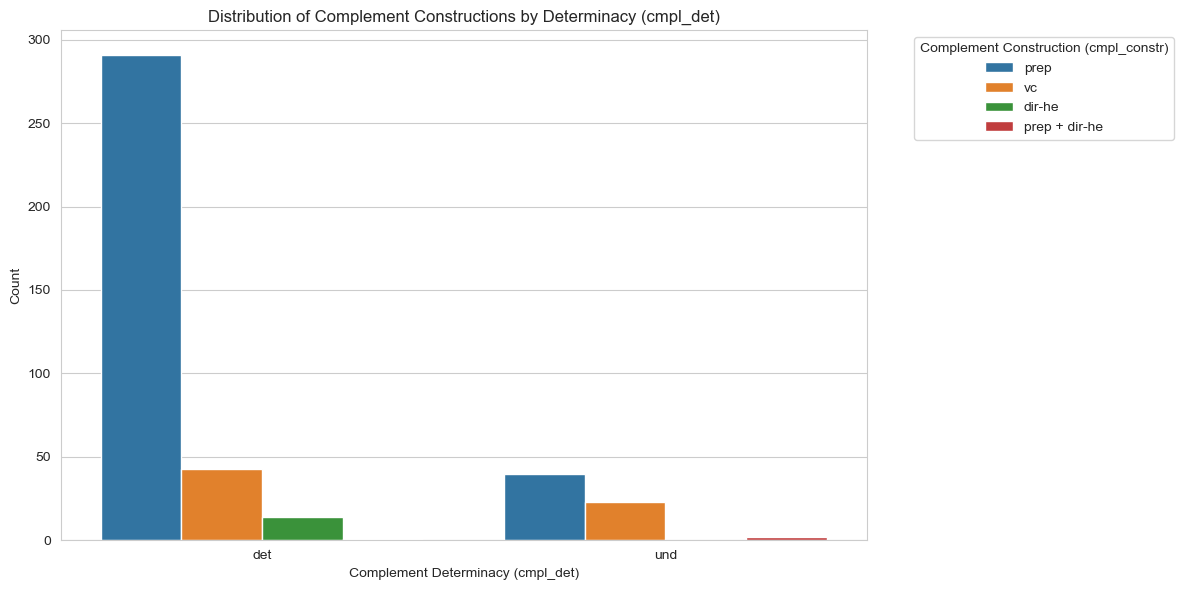

In [13]:
# Visualize the distribution of cmpl_constr for each value of cmpl_det
plt.figure(figsize=(12, 6))
sns.countplot(x='cmpl_det', hue='cmpl_constr', data=filtered_data) # palette='viridis'
plt.title('Distribution of Complement Constructions by Determinacy (cmpl_det)')
plt.xlabel('Complement Determinacy (cmpl_det)')
plt.ylabel('Count')
plt.legend(title='Complement Construction (cmpl_constr)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

C:\Users\perez\AppData\Local\Temp\ipykernel_24336\1133660386.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentage_df = filtered_data.groupby(['cmpl_det', 'cmpl_constr'], group_keys=True).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')


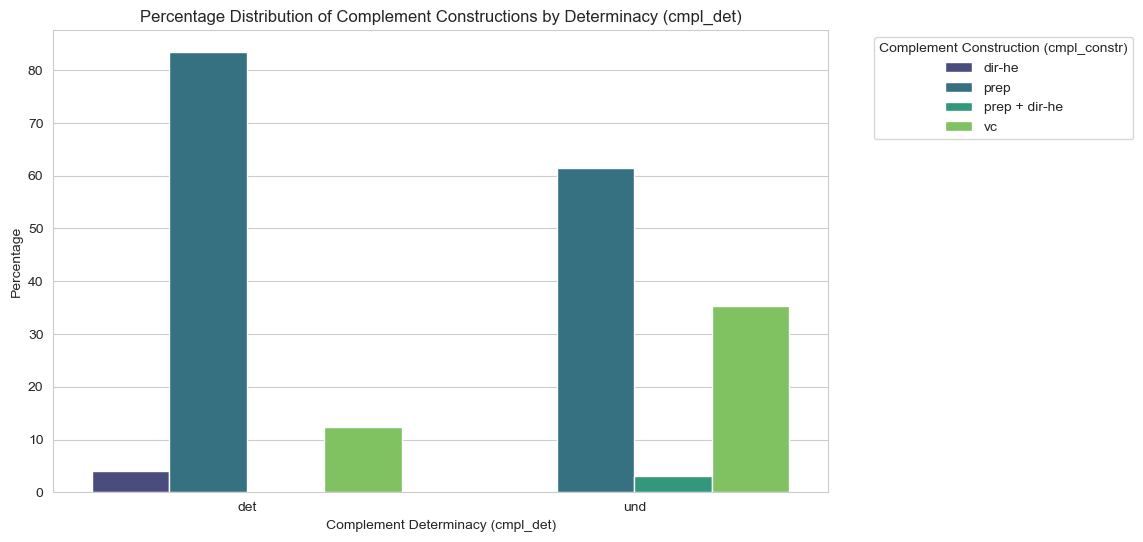

In [14]:
# Calculate the percentage distribution of cmpl_constr within each cmpl_det category
percentage_df = filtered_data.groupby(['cmpl_det', 'cmpl_constr'], group_keys=True).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='cmpl_det', y='Percentage', hue='cmpl_constr', data=percentage_df, palette='viridis')
plt.title('Percentage Distribution of Complement Constructions by Determinacy (cmpl_det)')
plt.xlabel('Complement Determinacy (cmpl_det)')
plt.ylabel('Percentage')
plt.legend(title='Complement Construction (cmpl_constr)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

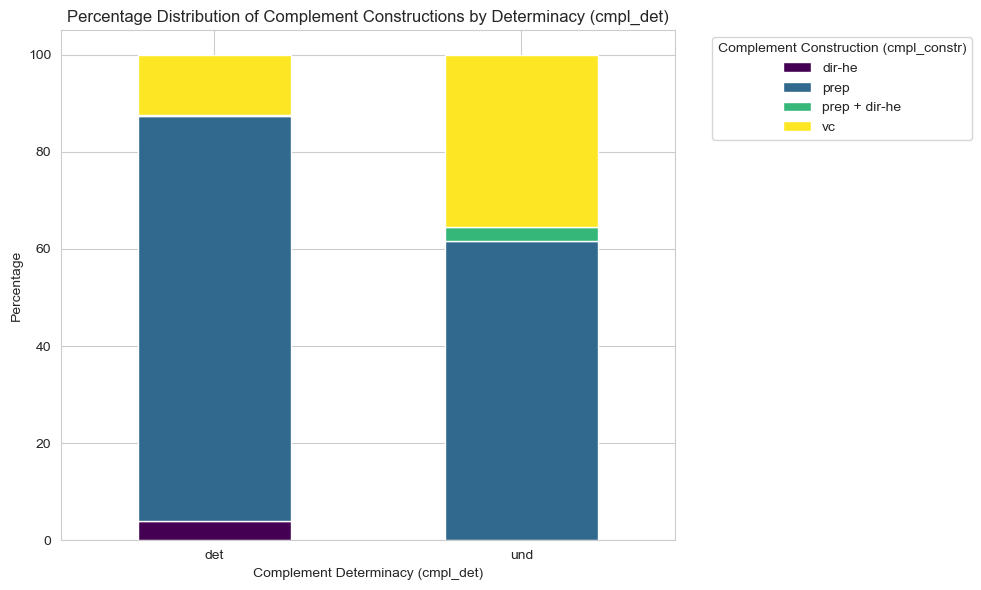

In [15]:
# Create a normalized cross-tabulation
crosstab_normalized = pd.crosstab(filtered_data['cmpl_det'], filtered_data['cmpl_constr'], normalize='index') * 100

# Plot the normalized stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage Distribution of Complement Constructions by Determinacy (cmpl_det)')
plt.xlabel('Complement Determinacy (cmpl_det)')
plt.ylabel('Percentage')
plt.legend(title='Complement Construction (cmpl_constr)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.tight_layout()

plt.show()

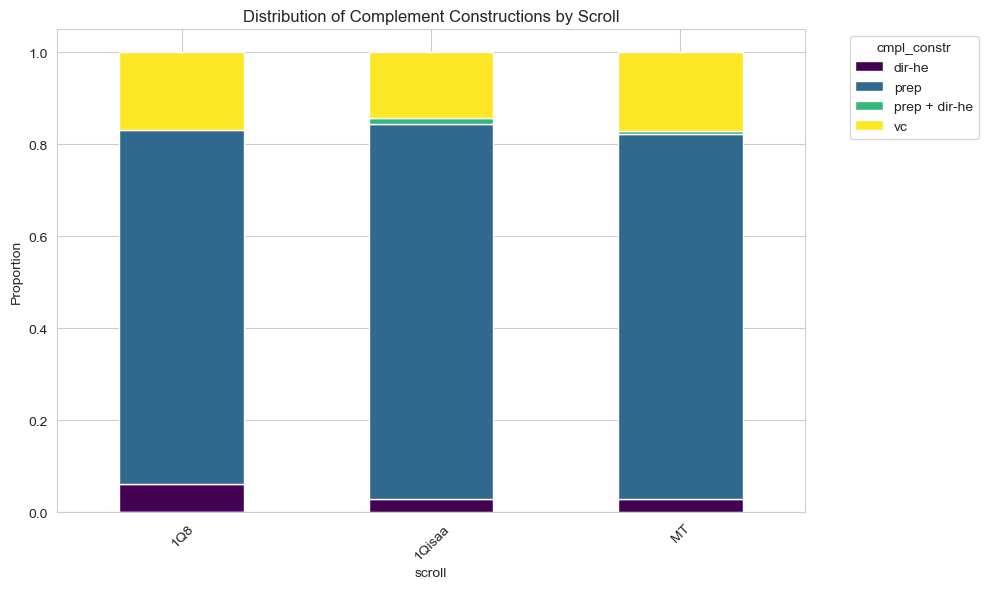

In [20]:
plot_stacked_bar(data, 'scroll', 'cmpl_constr', 'Distribution of Complement Constructions by Scroll')

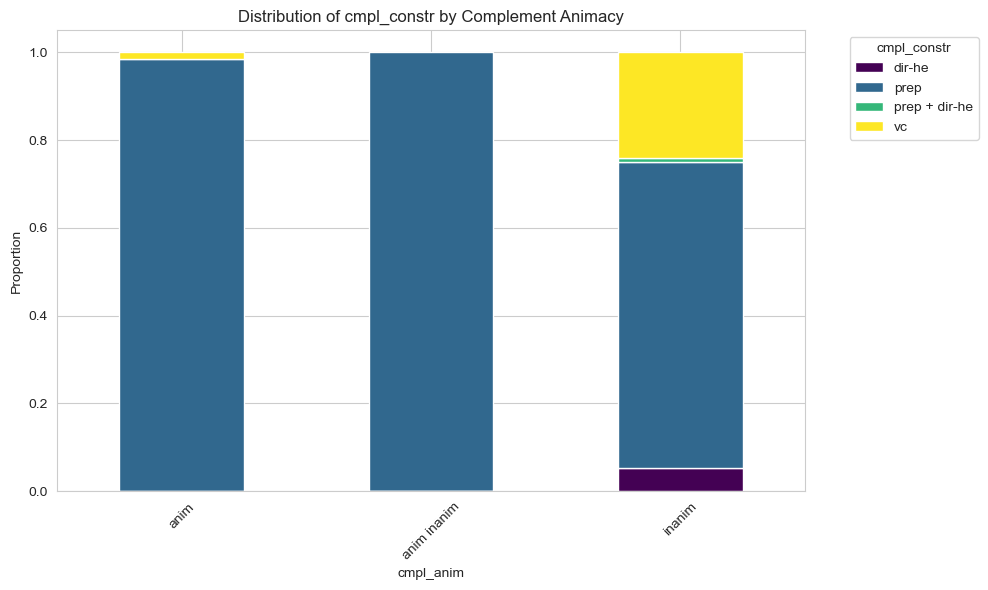

In [17]:
plot_stacked_bar(data, 'cmpl_anim', 'cmpl_constr', 'Distribution of cmpl_constr by Complement Animacy')

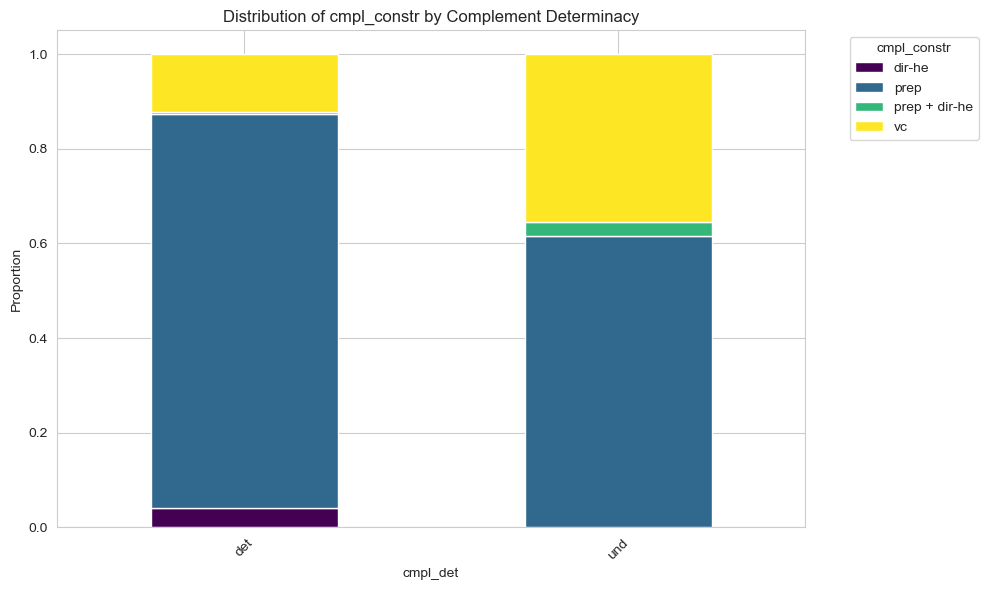

In [30]:
plot_stacked_bar(data, 'cmpl_det', 'cmpl_constr', 'Distribution of cmpl_constr by Complement Determinacy')

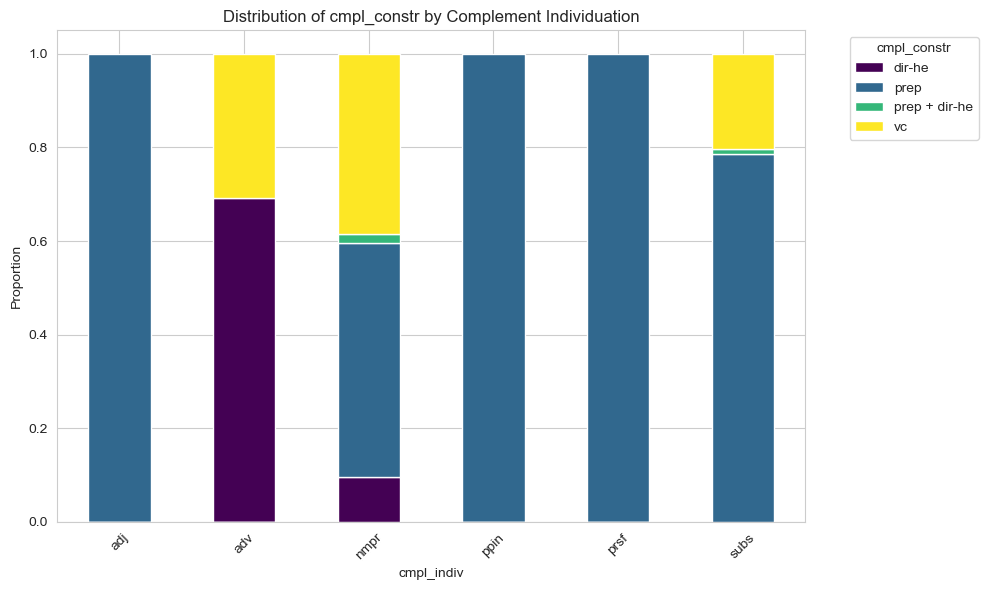

In [31]:
plot_stacked_bar(data, 'cmpl_indiv', 'cmpl_constr', 'Distribution of cmpl_constr by Complement Individuation')

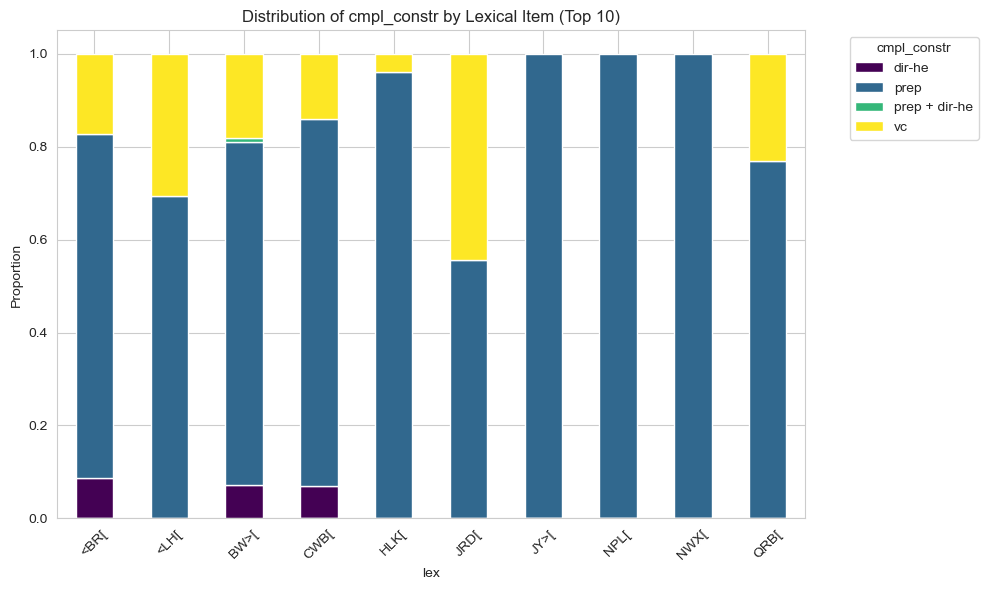

In [32]:
# DISTRIBUTION OF COMPLEMENT CONSTRUCTION IN THE TOP 10 LEXEMES
# Identify the most frequent lexical items in 'lex'
top_lex = data['lex'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the most frequent lexical items
filtered_data = data[data['lex'].isin(top_lex)]

# Plotting the distribution of cmpl_constr for the top lexical items
plot_stacked_bar(filtered_data, 'lex', 'cmpl_constr', 'Distribution of cmpl_constr by Lexical Item (Top 10)')

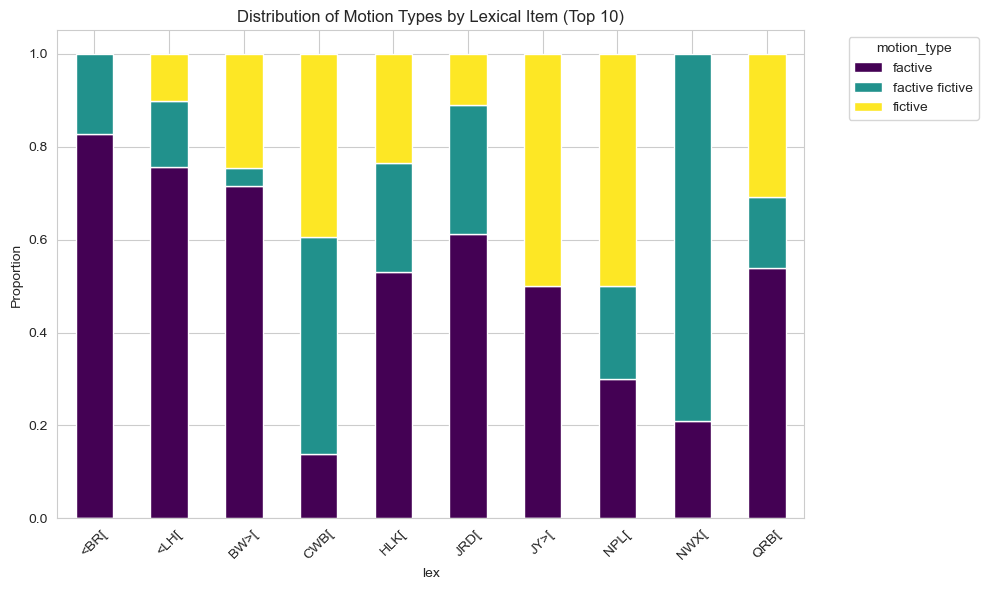

In [34]:
# DISTRIBUTION OF MOTION TYPE IN THE TOP 10 LEXEMES
# Identify the most frequent lexical items in 'lex'
top_lex = data['lex'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the most frequent lexical items
filtered_data = data[data['lex'].isin(top_lex)]

# Plotting the distribution of motion_type for the top lexical items
plot_stacked_bar(filtered_data, 'lex', 'motion_type', 'Distribution of Motion Types by Lexical Item (Top 10)')

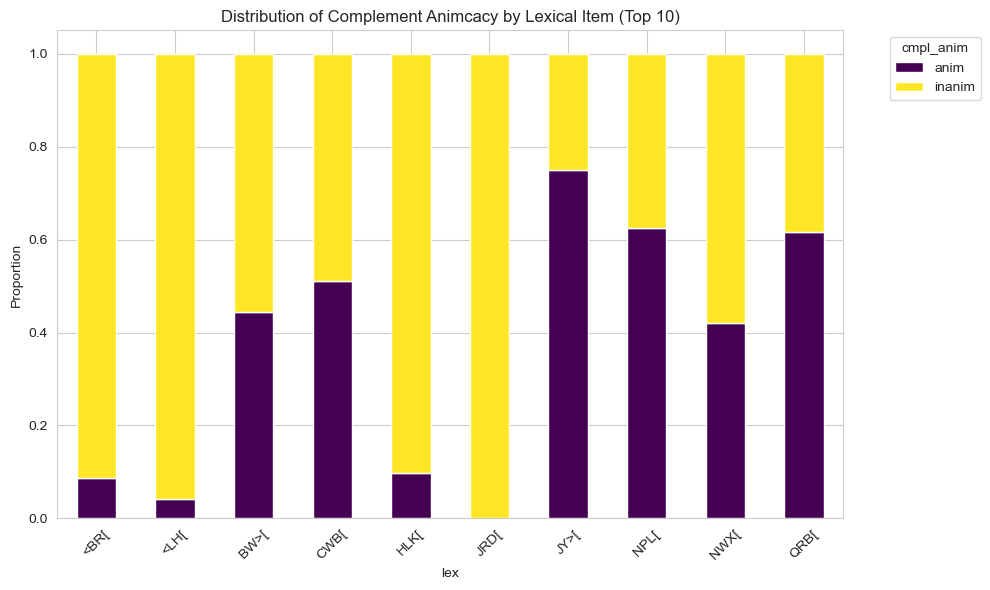

In [35]:
# DISTRIBUTION OF COMPLEMENT ANIMACY IN THE TOP 10 LEXEMES
# Identify the most frequent lexical items in 'lex'
top_lex = data['lex'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the most frequent lexical items
filtered_data = data[data['lex'].isin(top_lex) & (data['cmpl_anim'] != "anim inanim")]

# Plotting the distribution of cmpl_anim for the top lexical items
plot_stacked_bar(filtered_data, 'lex', 'cmpl_anim', 'Distribution of Complement Animcacy by Lexical Item (Top 10)')

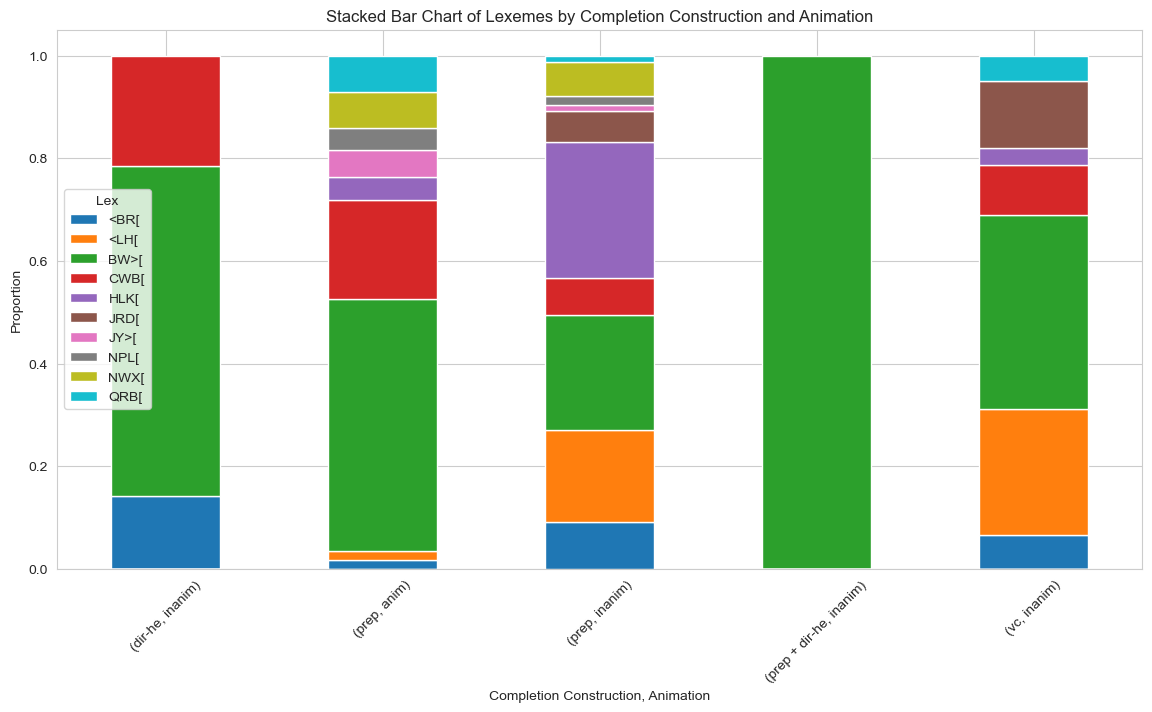

In [36]:
# INVESTIGATE CONSTRUCTION, ANIMACY AND LEXEME

# Create a crosstab to use for the stacked bar chart
ct = pd.crosstab(index=[filtered_data['cmpl_constr'], filtered_data['cmpl_anim']], columns=filtered_data['lex'], normalize='index')

# Plot stacked bars
ct.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Stacked Bar Chart of Lexemes by Completion Construction and Animation')
plt.xlabel('Completion Construction, Animation')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Lex')
plt.show()

In [37]:
# INVESTIGATE THE USE OF VERBS IN CERTAIN MOTION TYPES - TOP 10 LEXEMES

# Exclude factive fictive motion type
filtered_df = df[df['motion_type'] != 'factive fictive']

# Calculate the total frequency of each lexeme
total_frequency = filtered_df['lex'].value_counts().nlargest(10)

# Get the names of the top 10 lexemes
top_lexemes = total_frequency.index.tolist()

In [38]:
# Filter the DataFrame to include only the top 10 lexemes
filtered_df_2 = filtered_df[filtered_df['lex'].isin(top_lexemes)]

In [39]:
# Aggregate data for top 10 lexemes
aggregated_data = filtered_df_2.groupby(['lex', 'motion_type']).size().unstack(fill_value=0)

# Normalize the data to get percentages
percentage_data = aggregated_data.div(aggregated_data.sum(axis=1), axis=0) * 100

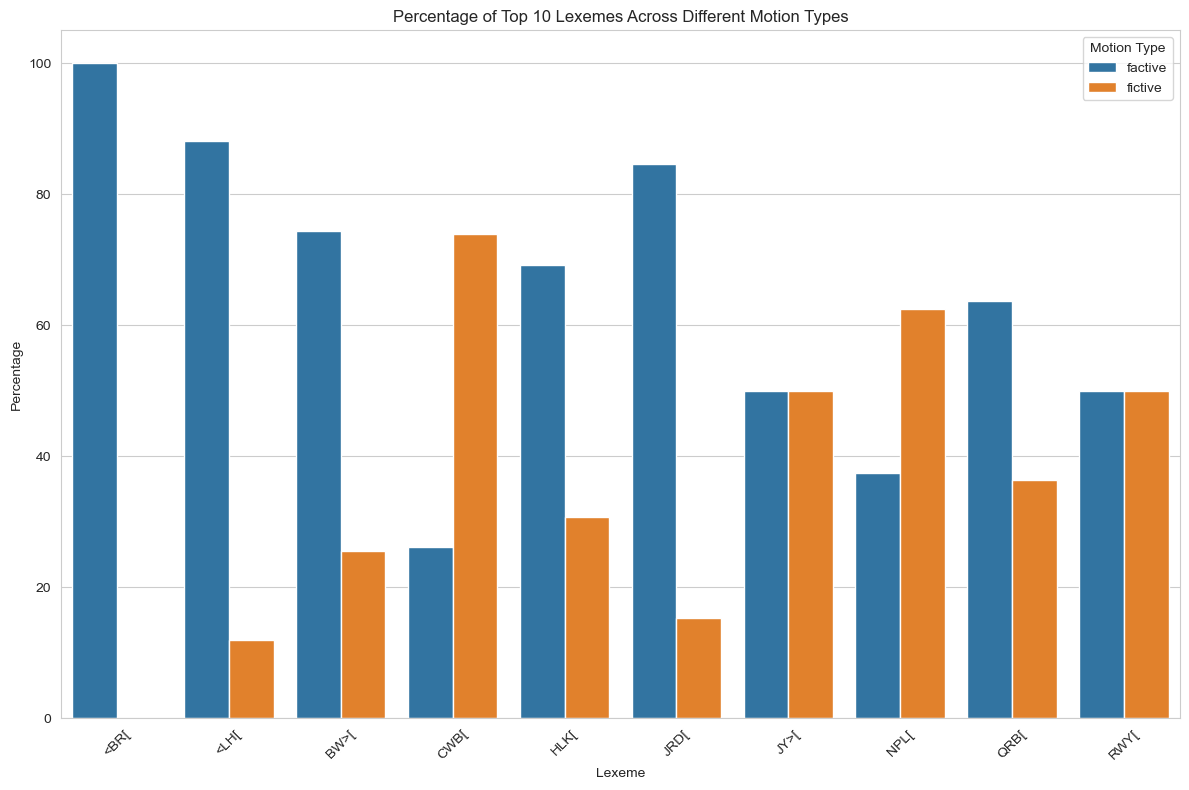

In [40]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=percentage_data.reset_index().melt(id_vars='lex'), 
            x='lex', 
            y='value', 
            hue='motion_type')

plt.title('Percentage of Top 10 Lexemes Across Different Motion Types')
plt.xlabel('Lexeme')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate labels if they overlap or are too long
plt.legend(title='Motion Type')
plt.tight_layout()
plt.show()

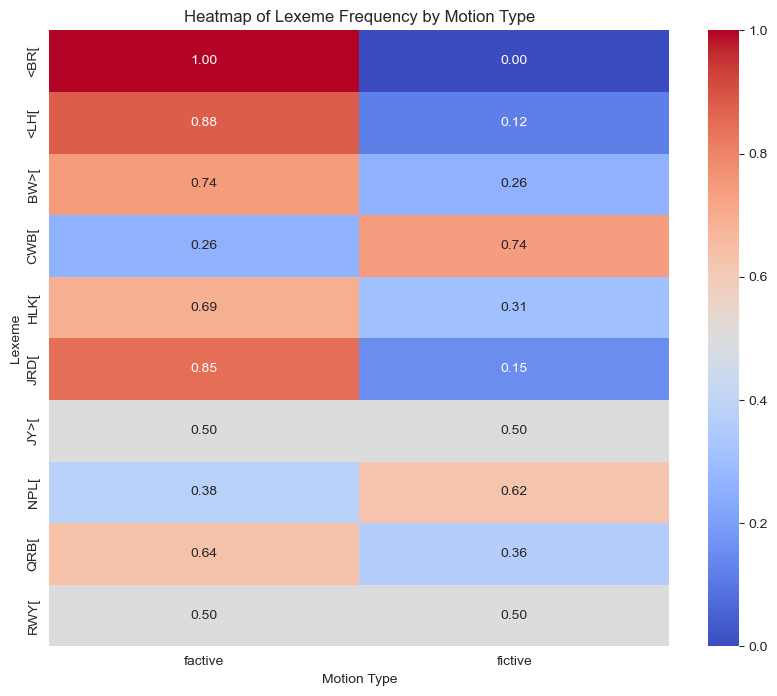

In [41]:
# Calculate the pivot table for heatmap
pivot_table = filtered_df_2.pivot_table(index='lex', columns='motion_type', aggfunc='size', fill_value=0)

# Normalize by row to get the proportion
normalized_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Lexeme Frequency by Motion Type')
plt.ylabel('Lexeme')
plt.xlabel('Motion Type')
plt.show()

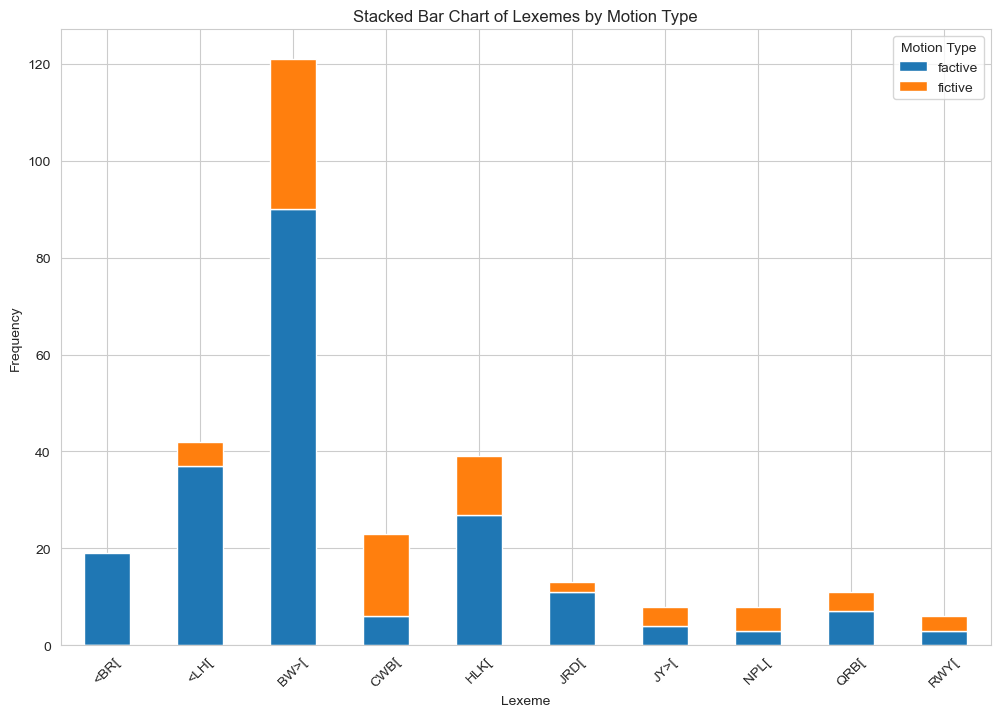

In [42]:
# Create a stacked bar plot (Frequency)
aggregated_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Lexemes by Motion Type')
plt.xlabel('Lexeme')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Motion Type')
plt.show()

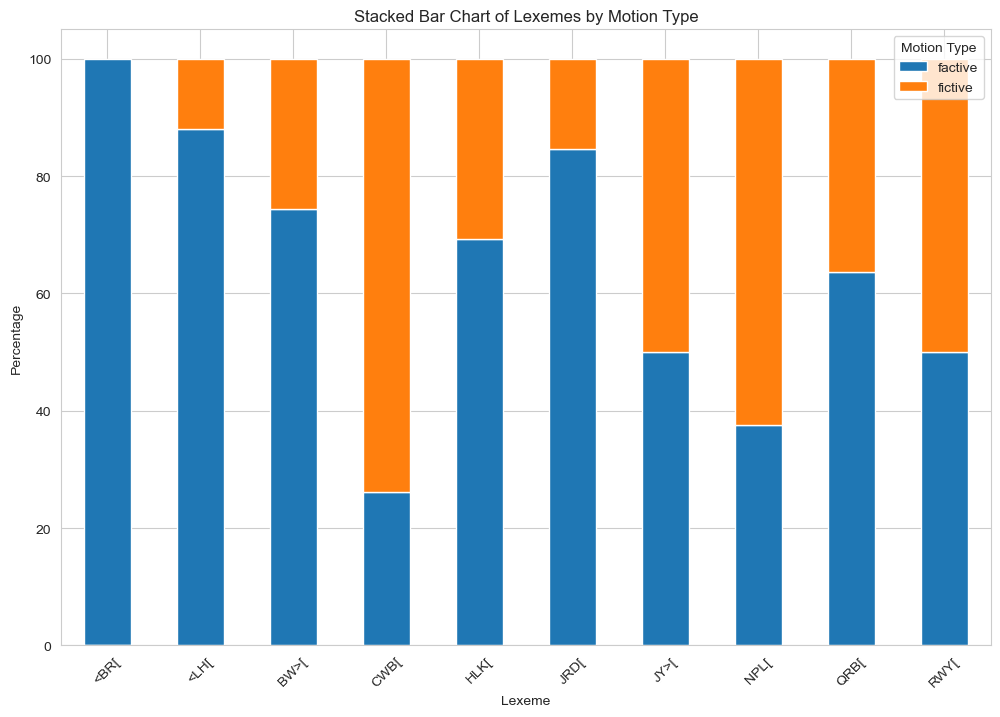

In [43]:
# Create a stacked bar plot (Frequency)
percentage_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Lexemes by Motion Type')
plt.xlabel('Lexeme')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Motion Type')
plt.show()

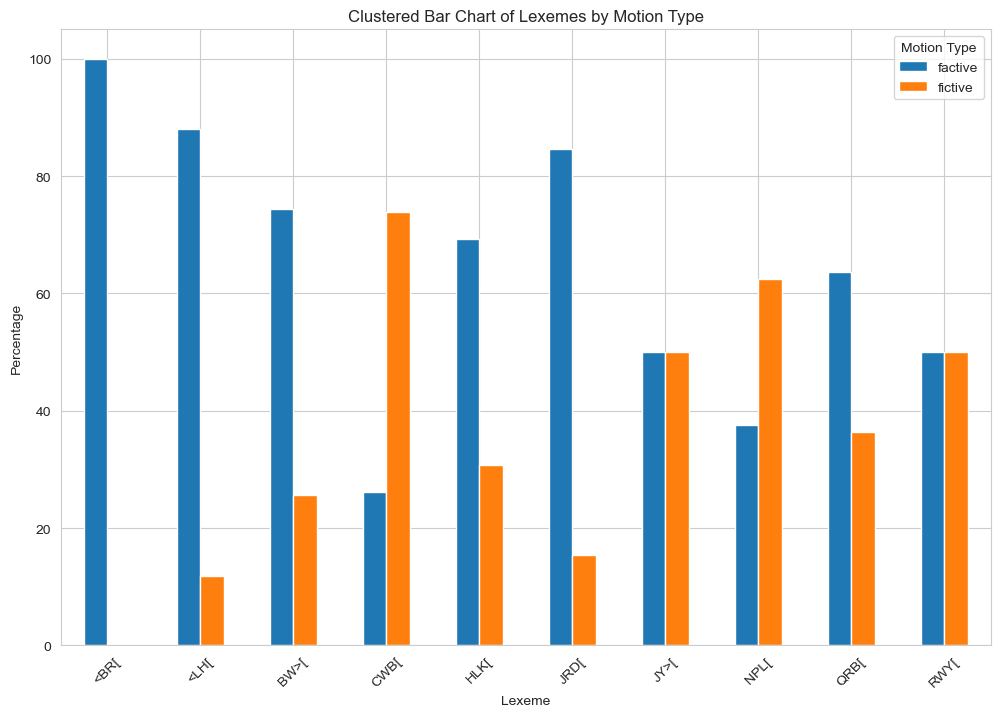

In [44]:
# Normalized data preparation from previous steps
percentage_data.plot(kind='bar', figsize=(12, 8))
plt.title('Clustered Bar Chart of Lexemes by Motion Type')
plt.xlabel('Lexeme')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Motion Type')
plt.show()

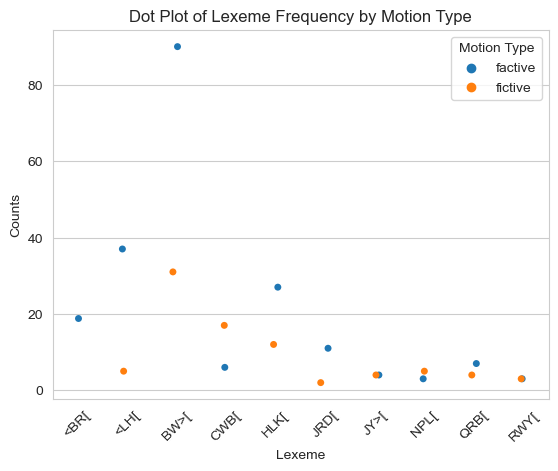

In [45]:
# Prepare data for a dot plot
melted_data = filtered_df_2.groupby(['lex', 'motion_type']).size().reset_index(name='counts')
sns.stripplot(data=melted_data, x='lex', y='counts', hue='motion_type', jitter=True)
plt.title('Dot Plot of Lexeme Frequency by Motion Type')
plt.xlabel('Lexeme')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Motion Type')
plt.show()

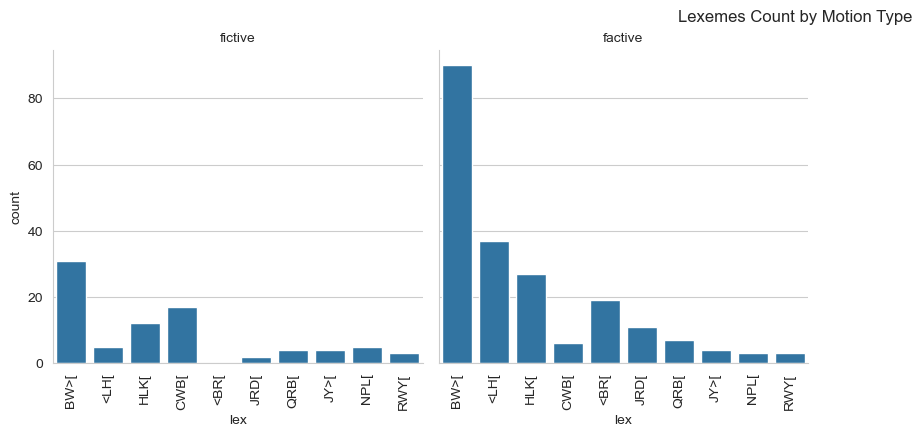

In [46]:
# Generate a Facet Grid
g = sns.FacetGrid(filtered_df_2, col='motion_type', col_wrap=4, height=4)
g.map_dataframe(sns.countplot, 'lex', order=top_lexemes)
g.set_xticklabels(rotation=90)
g.set_titles("{col_name}")
g.fig.suptitle('Lexemes Count by Motion Type', y=1.02)
plt.show()

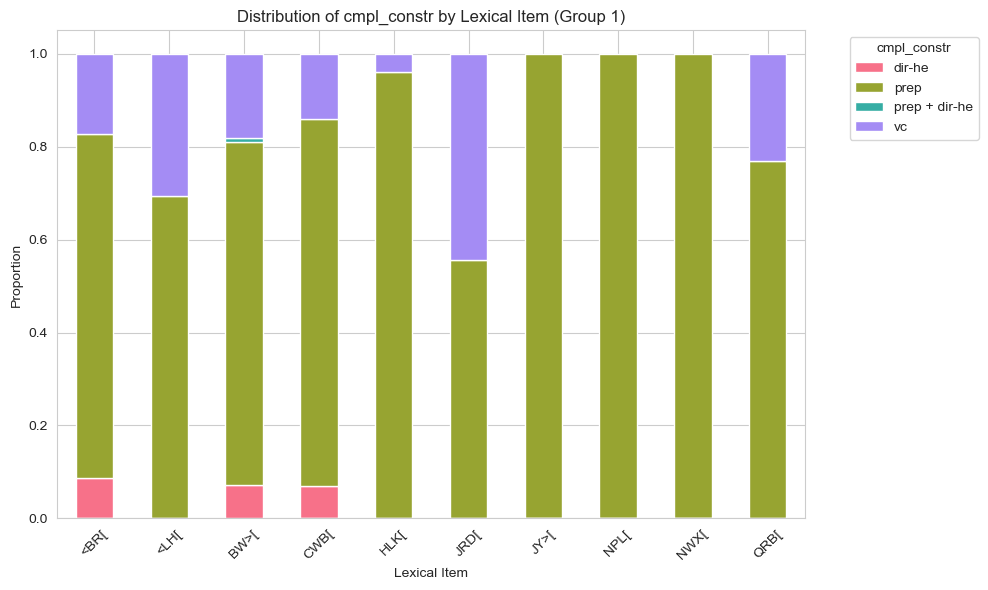

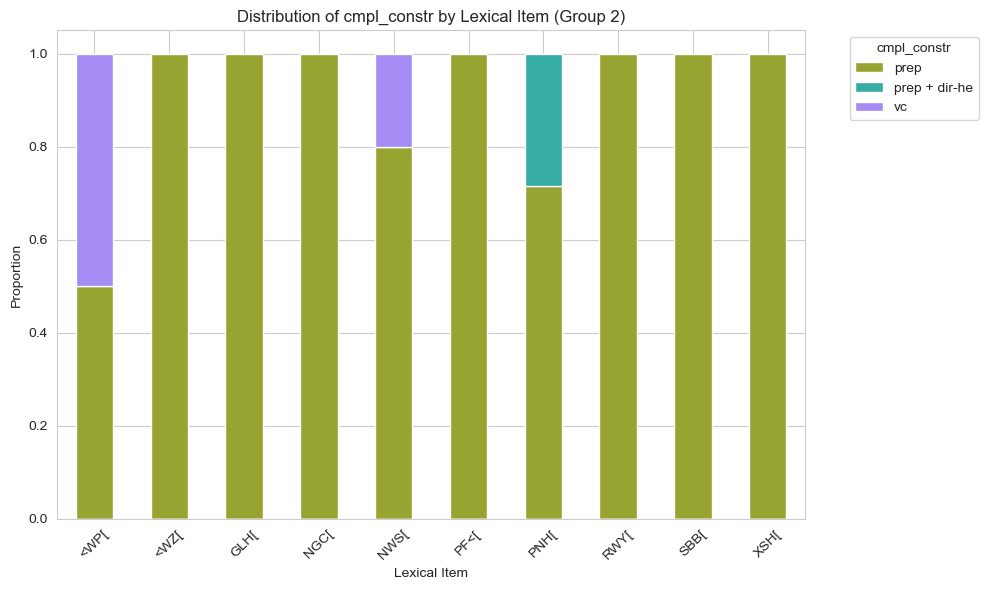

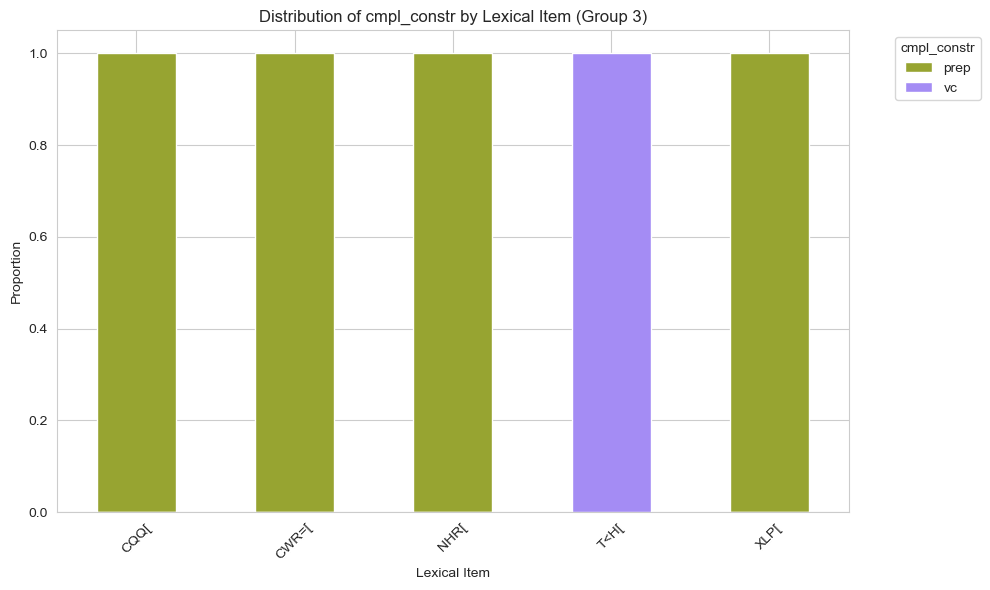

In [47]:
### VISUALISE ALL THE LEXEMES AND THE COMPLEMENT CONSTRUCTIONS PER LEXEME ###

# Get unique lexical items sorted by their frequency (most frequent first)
unique_lex = data['lex'].value_counts().index.tolist()

# Determine the number of plots needed (each plot contains 10 lexical items)
num_plots = ceil(len(unique_lex) / 10)

# Identify all unique values of cmpl_constr and sort them for consistency
unique_cmpl_constr = sorted(data['cmpl_constr'].unique())

# Define a custom color palette (using seaborn's color palette options or custom colors)
# Here, we use seaborn's "husl" palette, but you can choose any or define your own colors
color_palette = sns.color_palette("husl", len(unique_cmpl_constr))
cmpl_constr_colors = dict(zip(unique_cmpl_constr, color_palette))

# Update the plotting function to use the custom color palette
def plot_lex_groups_custom_colors(group, group_number, palette):
    """
    Creates a stacked bar chart for a group of lexical items using a custom color palette.

    Parameters:
    - group: list, the current group of lexical items to plot.
    - group_number: int, the identifier for the group (used for the plot title).
    - palette: dict, a dictionary mapping cmpl_constr values to specific colors.
    """
    group_data = data[data['lex'].isin(group)]
    crosstab = pd.crosstab(group_data['lex'], group_data['cmpl_constr'], normalize='index')

    # Create the plot with the custom palette
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=[palette[x] for x in crosstab.columns])
    plt.title(f'Distribution of cmpl_constr by Lexical Item (Group {group_number})')
    plt.xlabel('Lexical Item')
    plt.ylabel('Proportion')
    plt.legend(title='cmpl_constr', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Iterate over the groups and plot with custom colors
for i in range(num_plots):
    start_index = i * 10
    end_index = start_index + 10
    lex_group = unique_lex[start_index:end_index]
    plot_lex_groups_custom_colors(lex_group, i + 1, cmpl_constr_colors)

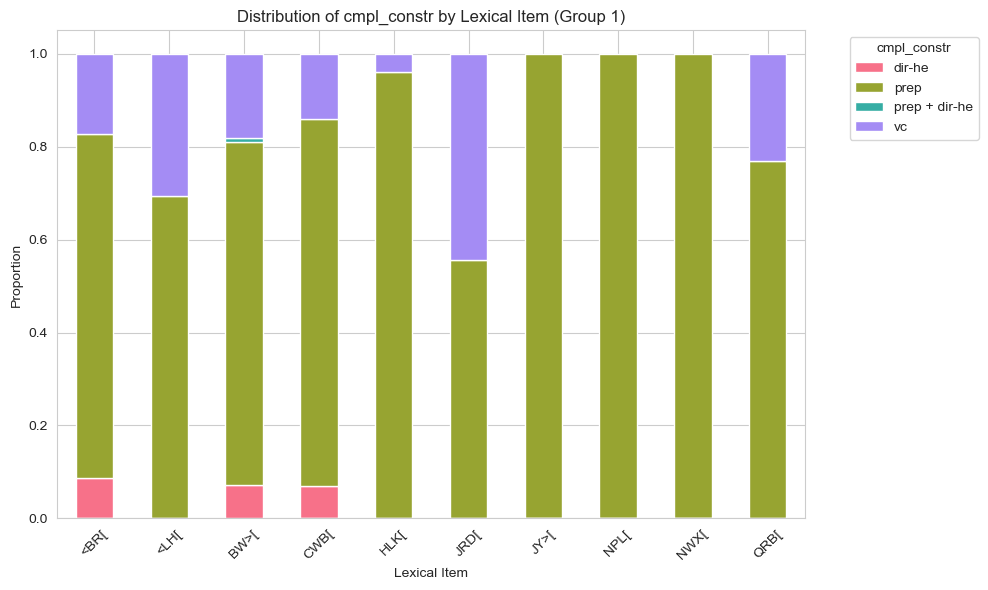

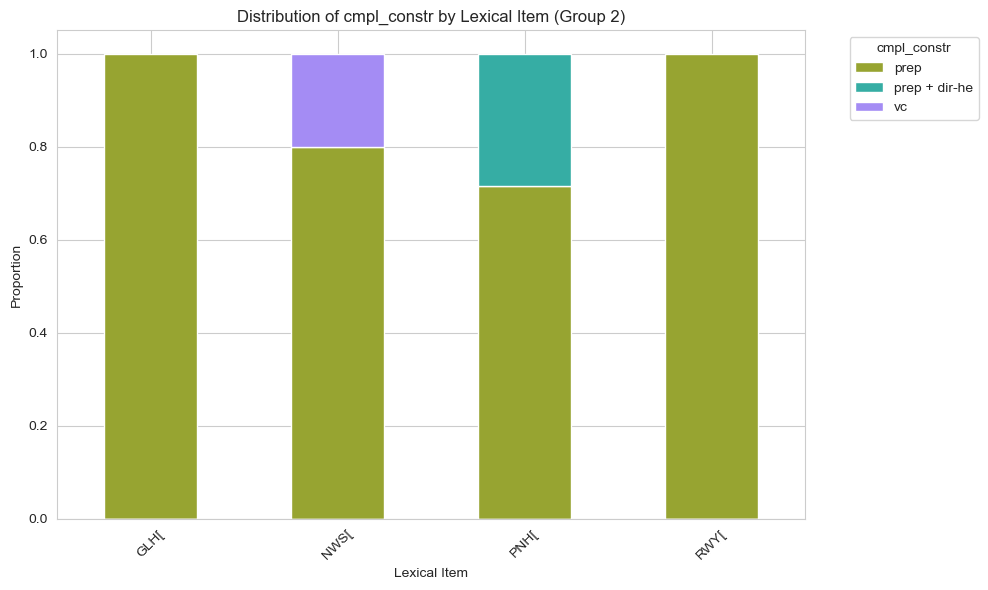

In [48]:
### VISUALISE THE LEXEMES 5+ AND THE COMPLEMENT CONSTRUCTIONS PER LEXEME ###

# Filter out lexical items with less than 5 occurrences
filtered_data_for_plotting = data.groupby('lex').filter(lambda x: len(x) >= 5)

# Get the unique lexical items from the filtered dataset, sorted by frequency
filtered_unique_lex = filtered_data_for_plotting['lex'].value_counts().index.tolist()

# Determine the number of plots needed for the filtered lexical items
filtered_num_plots = ceil(len(filtered_unique_lex) / 10)

# Iterate over the groups of filtered lexical items and plot with custom colors
for i in range(filtered_num_plots):
    start_index = i * 10
    end_index = start_index + 10
    filtered_lex_group = filtered_unique_lex[start_index:end_index]
    plot_lex_groups_custom_colors(filtered_lex_group, i + 1, cmpl_constr_colors)

In [49]:
### CHI SQUARE OF INDEPENDENCE COMPLEMENT CONSTRUCTION AND LEXEME ###
#(with more than 5 occurrences)

from scipy.stats import chi2_contingency

# Function to perform Chi-square test and return the results
def chi_square_test(data, var1, var2):
    """
    Performs a Chi-square test of independence between two categorical variables.

    Parameters:
    - data: pandas DataFrame containing the data.
    - var1: str, the first variable for the test.
    - var2: str, the second variable for the test.

    Returns:
    A tuple containing the Chi-square statistic, p-value, and degrees of freedom.
    """
    # Create a cross-tabulation table
    crosstab = pd.crosstab(data[var1], data[var2])
    
    # Perform the Chi-square test
    chi2, p, dof, _ = chi2_contingency(crosstab)
    
    return chi2, p, dof

# Filter out lexical items with less than 5 occurrences
filtered_lex_data = data.groupby('lex').filter(lambda x: len(x) >= 5)

# Perform the Chi-square test for the filtered dataset
chi2_filtered_lex, p_filtered_lex, dof_filtered_lex = chi_square_test(filtered_lex_data, 'lex', 'cmpl_constr')

# Display the results of the Chi-square test
chi_square_results_filtered_lex = {
    'Chi-square Statistic': chi2_filtered_lex,
    'p-value': p_filtered_lex,
    'Degrees of Freedom': dof_filtered_lex
}

chi_square_results_filtered_lex

{'Chi-square Statistic': 122.23373343752104,
 'p-value': 1.6249628488526447e-10,
 'Degrees of Freedom': 39}

### Chi-square Test of Independence Results

- **Variables**: Lexical Items (`lexeme`) vs. Complement Constructions (`complement construction`)
- **Chi-square Statistic**: 147.057
- **Degrees of Freedom**: 48
- **p-value**: 5.52e-12

#### Interpretation:
The very low p-value indicates a significant association between lexical items and complement constructions, suggesting that the type of lexical item is likely to influence the construction of the complement. With a Chi-square statistic of 147.057 and 48 degrees of freedom, the test provides strong evidence to reject the null hypothesis of independence between these variables.
##### However, it is difficult to conclude on the basic of this simple test, as many other variables should be taken into consideration (for instance, how often does each lexeme occur with animate/inanimate complements, etc.).

In [50]:
# Function to perform Chi-square test and return the results
def chi_square_test(data, var1, var2):
    """
    Performs a Chi-square test of independence between two categorical variables.

    Parameters:
    - data: pandas DataFrame containing the data.
    - var1: str, the first variable for the test.
    - var2: str, the second variable for the test.

    Returns:
    A tuple containing the Chi-square statistic, p-value, and degrees of freedom.
    """
    # Create a cross-tabulation table
    crosstab = pd.crosstab(data[var1], data[var2])
    
    # Perform the Chi-square test
    chi2, p, dof, _ = chi2_contingency(crosstab)
    
    return chi2, p, dof

# Variables to test
variables = ['scroll', 'cmpl_anim', 'cmpl_det', 'cmpl_indiv']

# Perform the Chi-square tests and collect results
chi_square_results = {}
for var in variables:
    chi2, p, dof = chi_square_test(data, var, 'cmpl_constr')
    chi_square_results[var] = {'Chi-square Statistic': chi2, 'p-value': p, 'Degrees of Freedom': dof}

# Convert results to DataFrame for better presentation
chi_square_results_df = pd.DataFrame(chi_square_results).transpose()

chi_square_results_df


,Chi-square Statistic,p-value,Degrees of Freedom
scroll,3.321727,7.675169e-01,6.0
cmpl_anim,49.723951,5.339782e-09,6.0
cmpl_det,30.048191,1.348217e-06,3.0
cmpl_indiv,253.950919,1.905173e-45,15.0


### Chi-square Test Results

#### Scroll vs. cmpl_constr:
- **Chi-square Statistic**: 3.995
- **p-value**: 0.677
- **Degrees of Freedom**: 6
- **Interpretation**: With a high p-value, there's no significant evidence to reject the null hypothesis, suggesting that `scroll` and `cmpl_constr` are independent, meaning there might not be a strong association between these variables.

#### cmpl_anim vs. cmpl_constr:
- **Chi-square Statistic**: 34.759
- **p-value**: ~0.000005
- **Degrees of Freedom**: 6
- **Interpretation**: The very low p-value indicates a significant association between `cmpl_anim` and `cmpl_constr`, suggesting that the animacy of the complement may impact its construction.

#### cmpl_det vs. cmpl_constr:
- **Chi-square Statistic**: 14.694
- **p-value**: ~0.022
- **Degrees of Freedom**: 6
- **Interpretation**: With a p-value below the common significance level (0.05), there is evidence to suggest a significant association between `cmpl_det` and `cmpl_constr`, indicating that the determinacy of the complement might influence its construction.

#### cmpl_indiv vs. cmpl_constr:
- **Chi-square Statistic**: 219.564
- **p-value**: ~0.00000000000000022
- **Degrees of Freedom**: 15
- **Interpretation**: The extremely low p-value strongly indicates a significant association between `cmpl_indiv` and `cmpl_constr`, suggesting that the individuation of the complement is likely to have a substantial impact on its construction.
